# Analytical solutions to diffusion equation for light transport in scattering medium model 


In [ ]:
import numpy as np

def de_timedomain(mua, musp, v, Reff, srcpos, detpos, t):
    """
    Semi-infinite medium analytical solution to the diffusion model.

    Parameters:
        mua (float): Absorption coefficient in 1/mm.
        musp (float): Reduced scattering coefficient in 1/mm.
        v (float): Speed of light in mm/s.
        Reff (float): Effective reflection coefficient.
        srcpos (array): Source position [x, y, z].
        detpos (array): Detector position [x, y, z].
        t (array): Time points in seconds.

    Returns:
        Phi: Fluence Φ at each time point.

        Adapted from the function tddiffusion.m from Monte Carlo eXtreme (MCX) by Qianqian Fang
    """
    #D = 1 / (3 * (mua + musp))
    D = 1 / (3 * musp ) # Furutsu1994.
    zb = (1 + Reff) / (1 - Reff) * 2 * D
    z0 = 1 / (musp + mua)
    
    srcpos = np.asarray(srcpos)
    detpos = np.asarray(detpos)
    t = np.asarray(t)

    # Calculate distances for the two image sources
    src_modified1 = np.array([srcpos[0], srcpos[1], srcpos[2] + z0])
    r = np.linalg.norm(src_modified1 - detpos)

    src_modified2 = np.array([srcpos[0], srcpos[1], srcpos[2] - z0 - 2 * zb])
    r2 = np.linalg.norm(src_modified2 - detpos)

    s = 4 * D * v * t

    # Compute each term of the fluence equation
    term1 = v / ((s * np.pi) ** (3/2))
    term2 = np.exp(-mua * v * t)
    term3 = np.exp(-(r**2) / s) - np.exp(-(r2**2) / s)

    Phi = term1 * term2 * term3
    return Phi


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Run an example


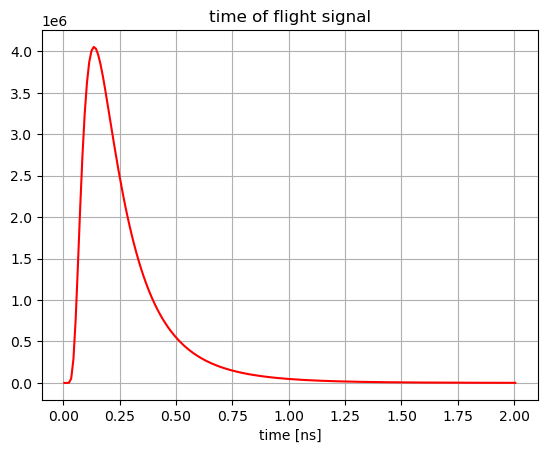

In [2]:
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
tstart = 0
tstep = 1e-11  # unit: second
tend = 2e-9
time = np.arange(tstart + tstep / 2, tend + tstep / 2, tstep)

# --- Optical Properties of the Diffusive Medium ---
mua = 0.01  # absorption [mm-1]
mus_p = 1   # reduced scattering [mm-1]
c0 = 299792458000  # speed of light [mm/s] (converted from m/s)
n = 1.37 # refractive index
cm = c0 / n
# --- Source and Detector Positions ---
srcpos = np.array([30, 30, 1])  # source positions [x y z] [mm]
detpos = np.array([30, 40, 1])  # detector positions [x y z] [mm]

Reff = 0.493
# --- Calculate the Time-Dependent Diffusion Signal ---
Phi = de_timedomain(mua,
                   mus_p,
                   cm,
                   Reff,
                   srcpos,
                   detpos,
                   time)

# --- Plot the Results ---
plt.figure()
plt.plot(time * 1e9, Phi, 'r')
plt.xlabel('time [ns]')
plt.title('time of flight signal')
plt.grid(True)
plt.show()